# Business Goal:
"Identify and Analyze High-Value Customer Segments by Region and Demographics."

## Display Table Names

In [32]:
import sqlite3
import pandas as pd

# Connect to your data warehouse
conn = sqlite3.connect('data/dw/smart_store.db')

# Correct table names
sales_df = pd.read_sql_query("SELECT * FROM fact_sales", conn)
customers_df = pd.read_sql_query("SELECT * FROM dim_customers", conn)
products_df = pd.read_sql_query("SELECT * FROM dim_products", conn)

conn.close()

# Display to confirm
print(sales_df.head())
print(customers_df.head())
print(products_df.head())


   transactionid    saledate  customerid  productid  storeid  campaignid  \
0            550  2024-01-06        1008        102      404           0   
1            551  2024-01-06        1009        105      403           0   
2            552  2024-01-16        1004        107      404           0   
3            553  2024-01-16        1006        102      406           0   
4            554  2024-01-25        1005        102      405           0   

   saleamount  sale_year  sale_month sale_month_name sale_quarter  
0       39.10       2024           1         January       2024Q1  
1       19.78       2024           1         January       2024Q1  
2      335.10       2024           1         January       2024Q1  
3      195.50       2024           1         January       2024Q1  
4      117.30       2024           1         January       2024Q1  
   customerid           name region    joindate   birthdate gender  age  \
0        1001  William White   East  2021-11-11  1966-12-07 

# Load and Merge Data

In [33]:
print("Sales columns:", sales_df.columns.tolist())
print("Customers columns:", customers_df.columns.tolist())
print("Products columns:", products_df.columns.tolist())


Sales columns: ['transactionid', 'saledate', 'customerid', 'productid', 'storeid', 'campaignid', 'saleamount', 'sale_year', 'sale_month', 'sale_month_name', 'sale_quarter']
Customers columns: ['customerid', 'name', 'region', 'joindate', 'birthdate', 'gender', 'age', 'age_group']
Products columns: ['productid', 'productname', 'category', 'unitprice']


In [34]:
import sqlite3
import pandas as pd

# Load tables from data warehouse
conn = sqlite3.connect('data/dw/smart_store.db')
sales_df = pd.read_sql_query("SELECT * FROM fact_sales", conn)
customers_df = pd.read_sql_query("SELECT * FROM dim_customers", conn)
products_df = pd.read_sql_query("SELECT * FROM dim_products", conn)
conn.close()

# Merge the tables for easier OLAP operations
merged_df = sales_df.merge(customers_df, on='customerid') \
                    .merge(products_df, on='productid')

print(merged_df.head())



   transactionid    saledate  customerid  productid  storeid  campaignid  \
0            550  2024-01-06        1008        102      404           0   
1            551  2024-01-06        1009        105      403           0   
2            552  2024-01-16        1004        107      404           0   
3            553  2024-01-16        1006        102      406           0   
4            554  2024-01-25        1005        102      405           0   

   saleamount  sale_year  sale_month sale_month_name  ...           name  \
0       39.10       2024           1         January  ...     Tony Stark   
1       19.78       2024           1         January  ...   Jason Bourne   
2      335.10       2024           1         January  ...      Chewbacca   
3      195.50       2024           1         January  ...  Tiffany James   
4      117.30       2024           1         January  ...         Dr Who   

  region    joindate   birthdate  gender age  age_group productname  category  \
0  No

# Slicing
Filter for high-value customers only

In [35]:
# Group by region and product category using the correct column
summary = high_value_customers_df.groupby(['region', 'category'])['saleamount_y'].sum().reset_index()

# Display the summary
print("\n✅ Slicing - High-Value Customer Sales Summary (Total Spend > $1000):\n")
print(summary)





✅ Slicing - High-Value Customer Sales Summary (Total Spend > $1000):

   region     category  saleamount_y
0    East     Clothing       4083.24
1    East  Electronics      58400.28
2    East       Sports        276.92
3   North     Clothing       3583.52
4   North  Electronics       1690.62
5   North       Sports        336.26
6   South     Clothing       3387.34
7   South  Electronics      20711.52
8   South       Sports         39.56
9    West     Clothing       2370.78
10   West  Electronics      13656.52
11   West       Sports         19.78


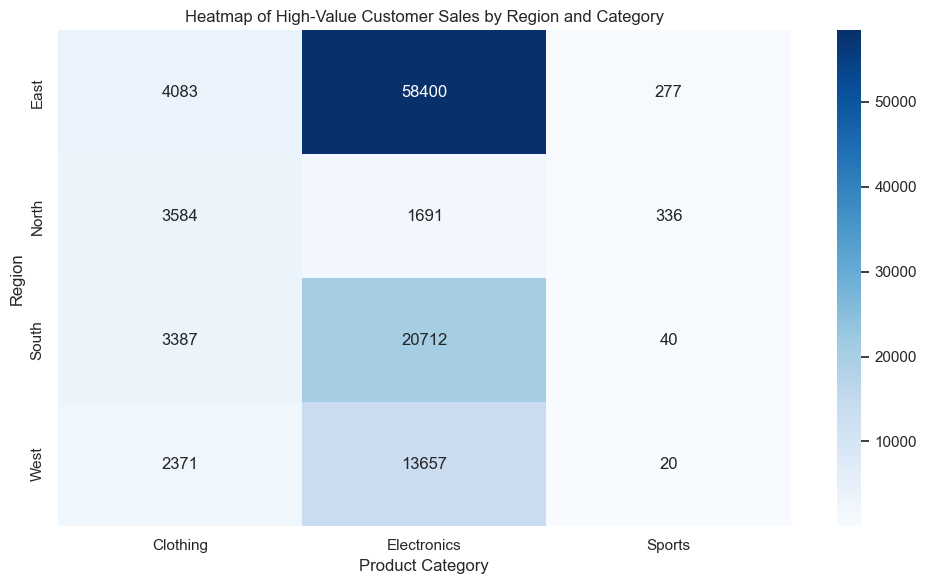

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

pivot = summary.pivot(index='region', columns='category', values='saleamount_y')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Blues')

plt.title('Heatmap of High-Value Customer Sales by Region and Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [36]:
summary_sorted = summary.sort_values(by='saleamount_y', ascending=False)
print(summary_sorted)


   region     category  saleamount_y
1    East  Electronics      58400.28
7   South  Electronics      20711.52
10   West  Electronics      13656.52
0    East     Clothing       4083.24
3   North     Clothing       3583.52
6   South     Clothing       3387.34
9    West     Clothing       2370.78
4   North  Electronics       1690.62
5   North       Sports        336.26
2    East       Sports        276.92
8   South       Sports         39.56
11   West       Sports         19.78


## Region and Category

C:\Users\linds\AppData\Local\Temp\ipykernel_8084\3644903887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_sorted, y='Region_Category', x='saleamount_y', palette='Blues_d')


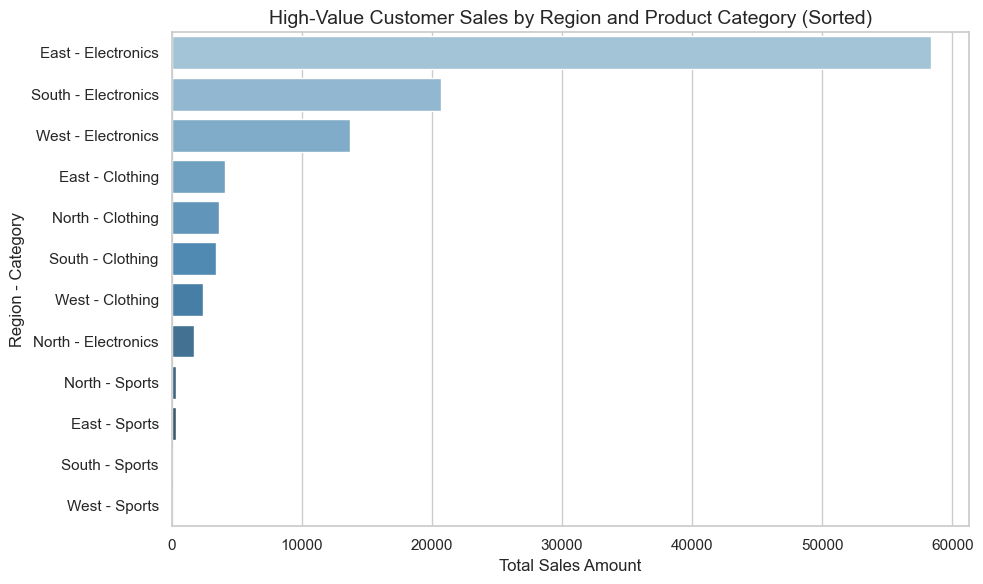

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the summary
summary_sorted = summary.sort_values(by='saleamount_y', ascending=False)

# Create a new column to combine Region + Category for clearer labeling
summary_sorted['Region_Category'] = summary_sorted['region'] + ' - ' + summary_sorted['category']

# Set the figure size
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_sorted, y='Region_Category', x='saleamount_y', palette='Blues_d')

# Add titles and labels
plt.title('High-Value Customer Sales by Region and Product Category (Sorted)', fontsize=14)
plt.xlabel('Total Sales Amount')
plt.ylabel('Region - Category')
plt.tight_layout()
plt.show()

In [37]:
# Slice: Filter for Electronics category
electronics_sales = merged_df[merged_df['category'] == 'Electronics']

# Show total sales for Electronics
electronics_summary = electronics_sales.groupby('category')['saleamount'].sum().reset_index()
print("Slicing - Total Sales for Electronics:\n", electronics_summary)


Slicing - Total Sales for Electronics:
       category  saleamount
0  Electronics    94458.94


# Dicing
Analyze by Region and Gender


In [38]:
# Dice: Break down by category and region
category_region_sales = merged_df.groupby(['category', 'region'])['saleamount'].sum().reset_index()

# Sort for better readability
category_region_sales = category_region_sales.sort_values(by='saleamount', ascending=False)
print("Dicing - Sales by Category and Region:\n", category_region_sales)



Dicing - Sales by Category and Region:
        category region  saleamount
4   Electronics   East    58400.28
6   Electronics  South    20711.52
7   Electronics   West    13656.52
0      Clothing   East     4083.24
1      Clothing  North     3583.52
2      Clothing  South     3387.34
3      Clothing   West     2370.78
5   Electronics  North     1690.62
9        Sports  North      336.26
8        Sports   East      276.92
10       Sports  South       39.56
11       Sports   West       19.78


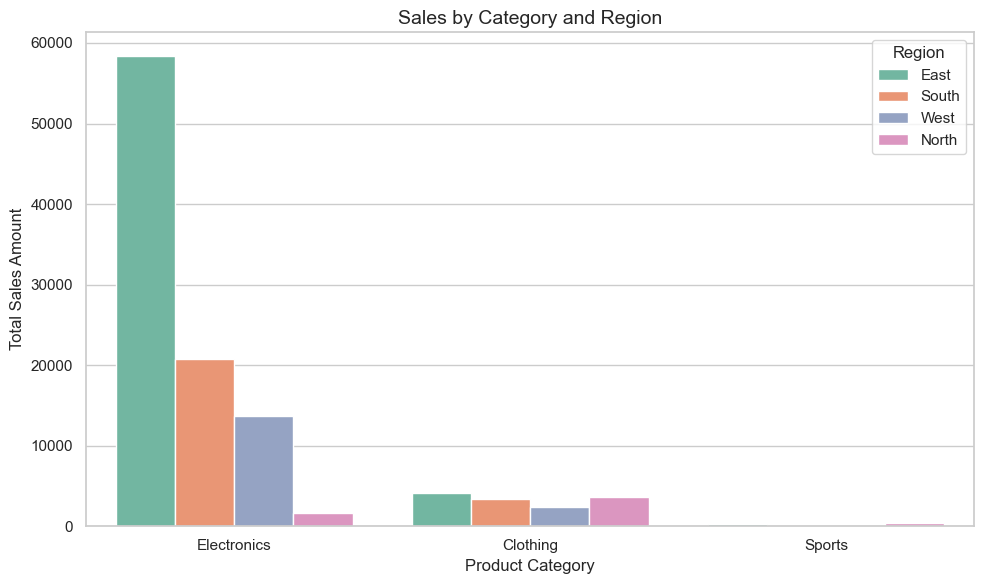

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_region_sales, x='category', y='saleamount', hue='region', palette='Set2')

# Titles and labels
plt.title('Sales by Category and Region', fontsize=14)
plt.ylabel('Total Sales Amount')
plt.xlabel('Product Category')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [56]:
# Dicing: Break down by Region and Gender
region_gender_sales = merged_df.groupby(['region', 'gender'])['saleamount'].sum().reset_index()

# Sort by sales for better readability
region_gender_sales = region_gender_sales.sort_values(by='saleamount', ascending=False)

# Display result
print("Dicing - Sales by Region and Gender:\n", region_gender_sales)


Dicing - Sales by Region and Gender:
   region  gender  saleamount
0   East  Female    31573.48
1   East    Male    31186.96
3  South  Female    24138.42
4   West    Male    16047.08
2  North    Male     5610.40


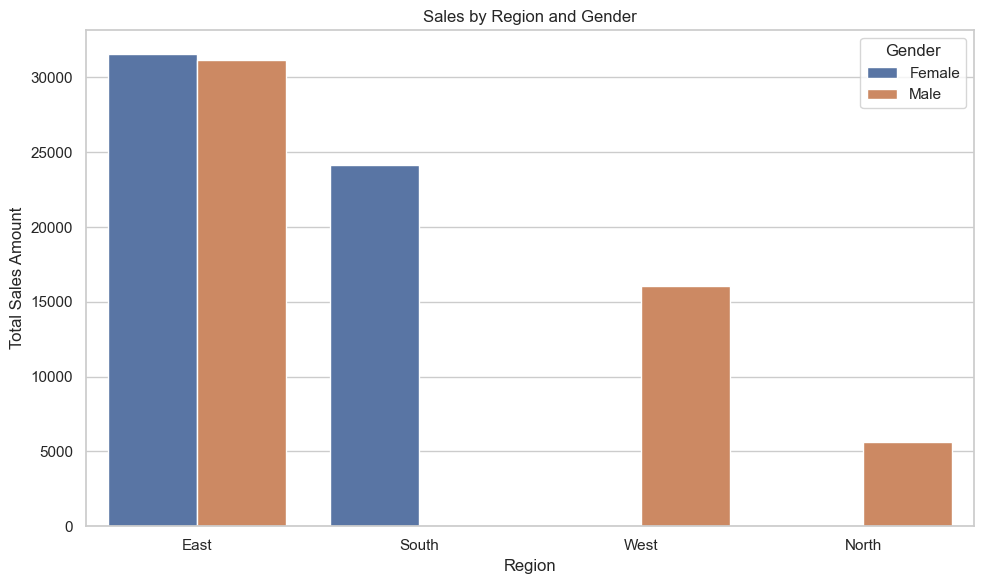

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=region_gender_sales, x='region', y='saleamount', hue='gender')
plt.title('Sales by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [58]:
# Dicing: Break down by Region, Gender, and Category
region_gender_category_sales = merged_df.groupby(['region', 'gender', 'category'])['saleamount'].sum().reset_index()

# Sort for better readability
region_gender_category_sales = region_gender_category_sales.sort_values(by='saleamount', ascending=False)

# Display the results
print("Dicing - Sales by Region, Gender, and Category:\n", region_gender_category_sales.head())


Dicing - Sales by Region, Gender, and Category:
    region  gender     category  saleamount
1    East  Female  Electronics    29578.62
4    East    Male  Electronics    28821.66
10  South  Female  Electronics    20711.52
13   West    Male  Electronics    13656.52
6   North    Male     Clothing     3583.52


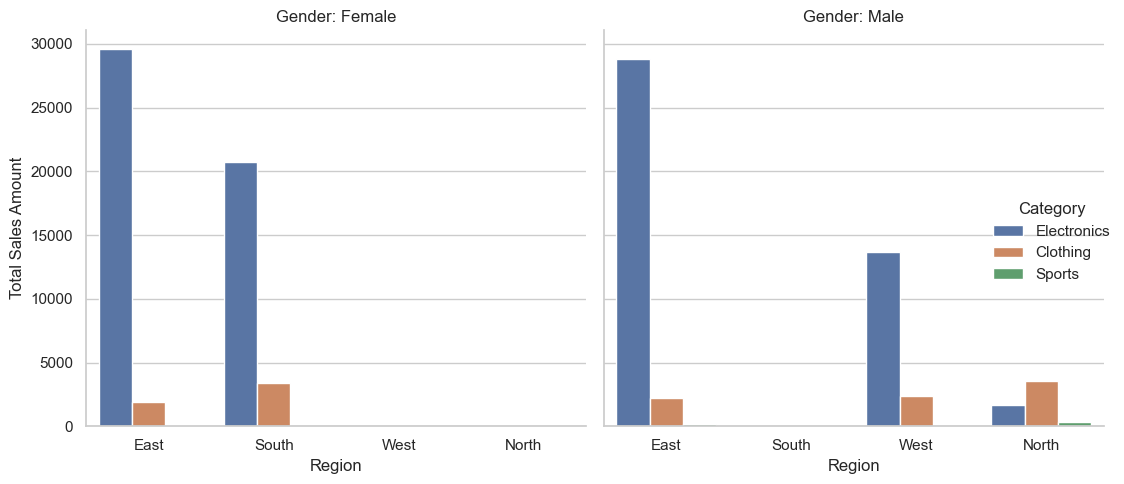

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using FacetGrid
g = sns.catplot(
    data=region_gender_category_sales,
    x='region', y='saleamount', hue='category',
    col='gender',
    kind='bar',
    height=5, aspect=1
)

g.set_titles("Gender: {col_name}")
g.set_axis_labels("Region", "Total Sales Amount")
g._legend.set_title('Category')
plt.tight_layout()
plt.show()


# Drilldown 
Analyze trends from Year → Quarter → Month


In [39]:
# Drilldown: Year > Month > Day
# Ensure 'saledate' is datetime
merged_df['saledate'] = pd.to_datetime(merged_df['saledate'])

# Create day column
merged_df['sale_day'] = merged_df['saledate'].dt.day

# Drilldown hierarchy: year → month → day
drilldown_sales = merged_df.groupby(['sale_year', 'sale_month', 'sale_day'])['saleamount'].sum().reset_index()
print("Drilldown - Sales by Year > Month > Day:\n", drilldown_sales.head())


Drilldown - Sales by Year > Month > Day:
    sale_year  sale_month  sale_day  saleamount
0       2024           1         6       58.88
1       2024           1        16      530.60
2       2024           1        25     2496.66
3       2024           1        29     3344.88
4       2024           2         6     7749.76


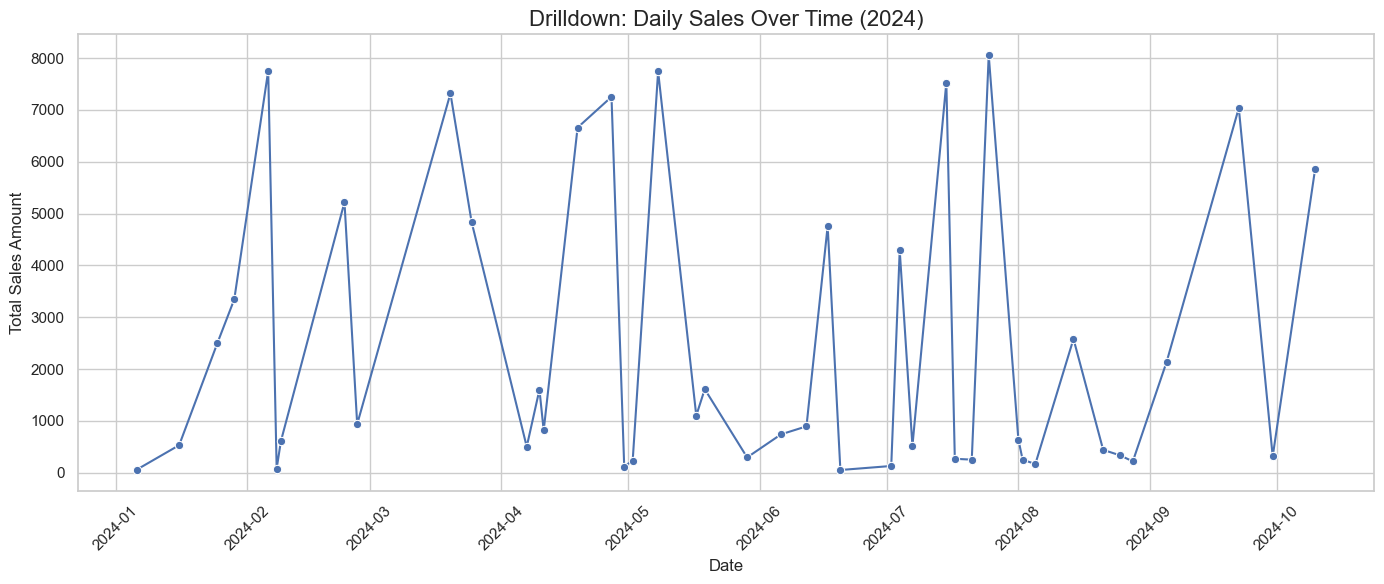

In [54]:
# Create proper datetime column using correct column name mapping
drilldown_sales['date'] = pd.to_datetime({
    'year': drilldown_sales['sale_year'],
    'month': drilldown_sales['sale_month'],
    'day': drilldown_sales['sale_day']
})

# Sort by date
drilldown_sales = drilldown_sales.sort_values(by='date')

# Plot clean line chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=drilldown_sales, x='date', y='saleamount', marker='o')

plt.title('Drilldown: Daily Sales Over Time (2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
